<a href="https://colab.research.google.com/github/KSKALSI/My-Data-Analyst-Portfolio/blob/main/Youtube_Revenue_EDA_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following project is an exploratory data analysis on a dataset obtained from kaggle.com.
The dataset is about the Revenue generated over the course of the year, 2020 by the creator of the dataset, through his Youtube channel.

### Cleaning the data

Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

In [ ]:
#Setting the default style for display of columns
pd.options.display.max_colwidth = 80

In [3]:
df = pd.read_csv('/content/Table data 2020.csv', encoding = 'utf-8')

In [4]:
df.shape

(502, 20)

In [ ]:
pd.options.display.max_columns = 20

In [ ]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,Total,0.0000,0.0,4.51,1.194713e+09,298430.0,162014.0,98.66,54174.0,200304.0,863740.0,4003186.0,35.95,87.0,129.0,663436.0,72661114.0,5.615796e+06,0:04:38,28632.987
1,2020-05-15,1.7097,4667.0,6.05,9.428700e+04,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,4.268278e+02,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,1.306750e+05,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,6.222458e+02,0:03:13,1.610
3,2020-05-17,1.6535,7131.0,5.50,1.578670e+05,87.0,46.0,99.00,7.0,53.0,334.0,693.0,25.02,0.0,0.0,281.0,11791.0,5.950406e+02,0:03:01,1.343
4,2020-05-18,1.7130,6004.0,5.86,1.264240e+05,56.0,41.0,98.42,8.0,34.0,373.0,498.0,25.38,0.0,0.0,339.0,10285.0,5.285037e+02,0:03:04,1.063


There are soft hyphens present in the column headers that will prove to be a problem later. So, they have to be removed:

In [5]:
df.columns = [x.replace('\xad','') for x in df.columns]

In [ ]:
df.head()

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
0,Total,0.0000,0.0,4.51,1.194713e+09,298430.0,162014.0,98.66,54174.0,200304.0,863740.0,4003186.0,35.95,87.0,129.0,663436.0,72661114.0,5.615796e+06,0:04:38,28632.987
1,2020-05-15,1.7097,4667.0,6.05,9.428700e+04,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,4.268278e+02,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,1.306750e+05,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,6.222458e+02,0:03:13,1.610
3,2020-05-17,1.6535,7131.0,5.50,1.578670e+05,87.0,46.0,99.00,7.0,53.0,334.0,693.0,25.02,0.0,0.0,281.0,11791.0,5.950406e+02,0:03:01,1.343
4,2020-05-18,1.7130,6004.0,5.86,1.264240e+05,56.0,41.0,98.42,8.0,34.0,373.0,498.0,25.38,0.0,0.0,339.0,10285.0,5.285037e+02,0:03:04,1.063


The zeroth row is of no use to us.

In [6]:
df.drop(0,inplace = True)
df.head()

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
1,2020-05-15,1.7097,4667.0,6.05,94287.0,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,426.8278,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,130675.0,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,622.2458,0:03:13,1.610
3,2020-05-17,1.6535,7131.0,5.50,157867.0,87.0,46.0,99.00,7.0,53.0,334.0,693.0,25.02,0.0,0.0,281.0,11791.0,595.0406,0:03:01,1.343
4,2020-05-18,1.7130,6004.0,5.86,126424.0,56.0,41.0,98.42,8.0,34.0,373.0,498.0,25.38,0.0,0.0,339.0,10285.0,528.5037,0:03:04,1.063
5,2020-05-19,1.6935,5938.0,6.02,122627.0,63.0,25.0,98.48,7.0,43.0,301.0,455.0,25.35,0.0,0.0,258.0,10056.0,495.8510,0:02:57,1.584


In [ ]:
df.describe()

,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Your estimated revenue (USD)
count,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.00000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.881840,53787.126000,5.143760,1.829573e+06,481.324000,265.48200,98.10418,84.16000,298.896000,1372.612000,6117.344000,31.339220,0.160000,0.228000,1073.716000,112029.986000,8603.532365,42.204774
std,0.294160,73201.877638,0.820052,2.492488e+06,1051.289613,464.80275,0.77030,106.65158,395.532463,1783.041895,10317.470393,5.642515,0.372394,0.540926,1413.711809,153411.108224,12462.521210,63.298060
min,1.444800,2184.000000,3.520000,4.748200e+04,12.000000,9.00000,95.22000,0.00000,12.000000,105.000000,174.000000,12.340000,0.000000,0.000000,67.000000,3617.000000,177.300600,0.767000
25%,1.625725,5942.500000,4.610000,1.234040e+05,48.000000,42.00000,97.68000,10.75000,60.000000,268.750000,480.750000,26.390000,0.000000,0.000000,219.000000,9615.500000,519.049725,2.650500
50%,1.828000,22398.500000,5.035000,5.576205e+05,140.500000,103.00000,98.23000,36.00000,113.500000,569.500000,1747.500000,31.210000,0.000000,0.000000,454.500000,36198.500000,2274.322300,10.790000
75%,2.103450,78916.000000,5.810000,2.925336e+06,464.750000,312.75000,98.62000,125.25000,327.250000,1903.750000,7915.750000,34.885000,0.000000,0.000000,1526.750000,176122.000000,13615.801675,62.730000
max,2.615800,482254.000000,7.560000,1.632350e+07,11582.000000,6513.00000,100.00000,664.00000,2177.000000,12474.000000,63543.000000,48.460000,2.000000,4.000000,10297.000000,954121.000000,73470.409300,397.066000


In [ ]:
df.columns

Index(['Date', 'Average views per viewer', 'Unique viewers',
       'Impressions click-through rate (%)', 'Impressions', 'Comments added',
       'Shares', 'Likes (vs. dislikes) (%)', 'Dislikes', 'Subscribers lost',
       'Subscribers gained', 'Likes', 'Average percentage viewed (%)',
       'Videos published', 'Videos added', 'Subscribers', 'Views',
       'Watch time (hours)', 'Average view duration',
       'Your estimated revenue (USD)'],
      dtype='object')

In [ ]:
df.dtypes

Date                                   object
Average views per viewer              float64
Unique viewers                        float64
Impressions click-through rate (%)    float64
Impressions                           float64
Comments added                        float64
Shares                                float64
Likes (vs. dislikes) (%)              float64
Dislikes                              float64
Subscribers lost                      float64
Subscribers gained                    float64
Likes                                 float64
Average percentage viewed (%)         float64
Videos published                      float64
Videos added                          float64
Subscribers                           float64
Views                                 float64
Watch time (hours)                    float64
Average view duration                  object
Your estimated revenue (USD)          float64
dtype: object

In [ ]:
df.tail()

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
497,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
498,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
499,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664
500,2021-09-26,2.3480,132573.0,4.24,5375782.0,527.0,555.0,98.73,191.0,1042.0,3194.0,14857.0,39.27,0.0,0.0,2152.0,311277.0,22117.2441,0:04:15,135.841
501,Show­ing top 500 res­ults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The last row has only null values, so it must be removed.

In [7]:
df.drop(501, inplace = True)

In [ ]:
df.isna().sum()

Date                                  0
Average views per viewer              0
Unique viewers                        0
Impressions click-through rate (%)    0
Impressions                           0
Comments added                        0
Shares                                0
Likes (vs. dislikes) (%)              0
Dislikes                              0
Subscribers lost                      0
Subscribers gained                    0
Likes                                 0
Average percentage viewed (%)         0
Videos published                      0
Videos added                          0
Subscribers                           0
Views                                 0
Watch time (hours)                    0
Average view duration                 0
Your estimated revenue (USD)          0
dtype: int64

No other null values found.

In [ ]:
df.loc[df.duplicated()]

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)


No duplicated values found.

Date column needs to be converted from string data type to datetime data type.

In [8]:
df.Date = pd.to_datetime(df.Date)

In [ ]:
df.dtypes

Date                                  datetime64[ns]
Average views per viewer                     float64
Unique viewers                               float64
Impressions click-through rate (%)           float64
Impressions                                  float64
Comments added                               float64
Shares                                       float64
Likes (vs. dislikes) (%)                     float64
Dislikes                                     float64
Subscribers lost                             float64
Subscribers gained                           float64
Likes                                        float64
Average percentage viewed (%)                float64
Videos published                             float64
Videos added                                 float64
Subscribers                                  float64
Views                                        float64
Watch time (hours)                           float64
Average view duration                         

###Feature Understanding

The final cleaned dataset is as follows:

In [ ]:
df

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
1,2020-05-15,1.7097,4667.0,6.05,94287.0,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,426.8278,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,130675.0,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,622.2458,0:03:13,1.610
3,2020-05-17,1.6535,7131.0,5.50,157867.0,87.0,46.0,99.00,7.0,53.0,334.0,693.0,25.02,0.0,0.0,281.0,11791.0,595.0406,0:03:01,1.343
4,2020-05-18,1.7130,6004.0,5.86,126424.0,56.0,41.0,98.42,8.0,34.0,373.0,498.0,25.38,0.0,0.0,339.0,10285.0,528.5037,0:03:04,1.063
5,2020-05-19,1.6935,5938.0,6.02,122627.0,63.0,25.0,98.48,7.0,43.0,301.0,455.0,25.35,0.0,0.0,258.0,10056.0,495.8510,0:02:57,1.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2021-09-22,2.2721,105872.0,4.04,4376635.0,546.0,399.0,98.19,195.0,972.0,2781.0,10594.0,25.75,0.0,0.0,1809.0,240554.0,19512.3516,0:04:52,126.600
497,2021-09-23,1.8941,215712.0,5.83,4854638.0,2741.0,764.0,99.10,312.0,1221.0,2953.0,34422.0,30.35,1.0,4.0,1732.0,408582.0,19855.7704,0:02:54,163.558
498,2021-09-24,2.1319,305881.0,6.08,7768271.0,4741.0,1055.0,99.09,521.0,1520.0,4804.0,56677.0,47.81,1.0,0.0,3284.0,652105.0,54463.2654,0:05:00,397.066
499,2021-09-25,2.3468,152920.0,4.51,5788014.0,671.0,633.0,98.53,276.0,1112.0,3555.0,18458.0,41.24,0.0,0.0,2443.0,358868.0,26757.4077,0:04:28,178.664


Of all the columns the following are of great interest:
1. Shares
2. Views
3. Likes
4. Impressions
5. Comments added
6. Your estimated revenue

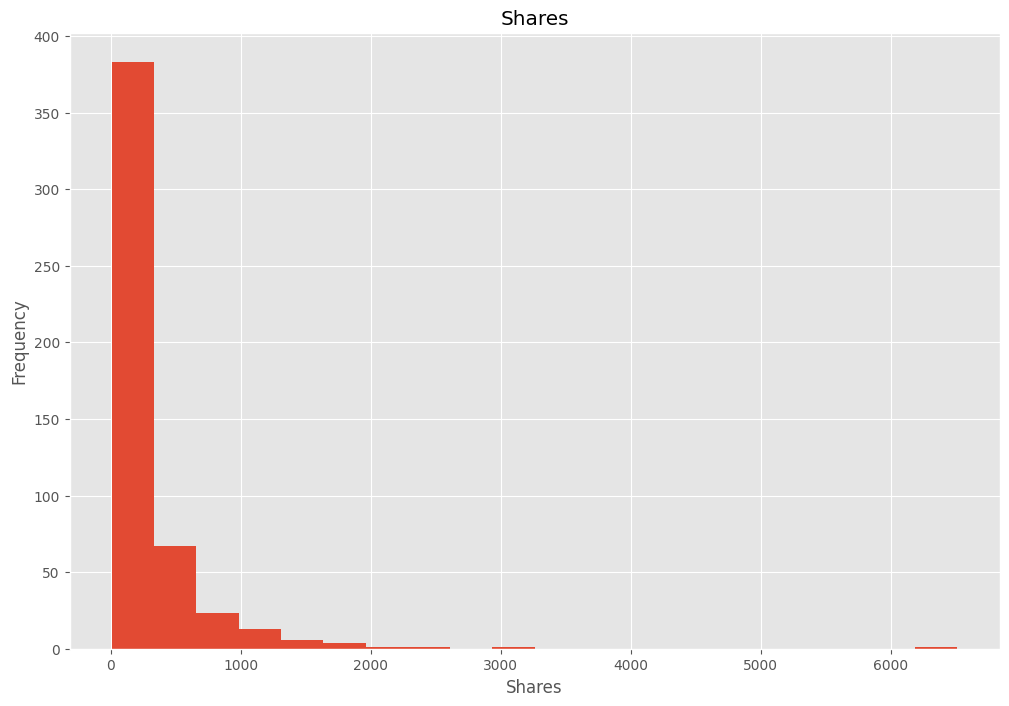

In [ ]:
ax = df.Shares.plot(kind = 'hist', bins = 20, title = 'Shares')
ax.set_xlabel('Shares')
plt.show()

<ipython-input-22-eab39b6749d1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','0','200K','400K','600K','800K','1M'])


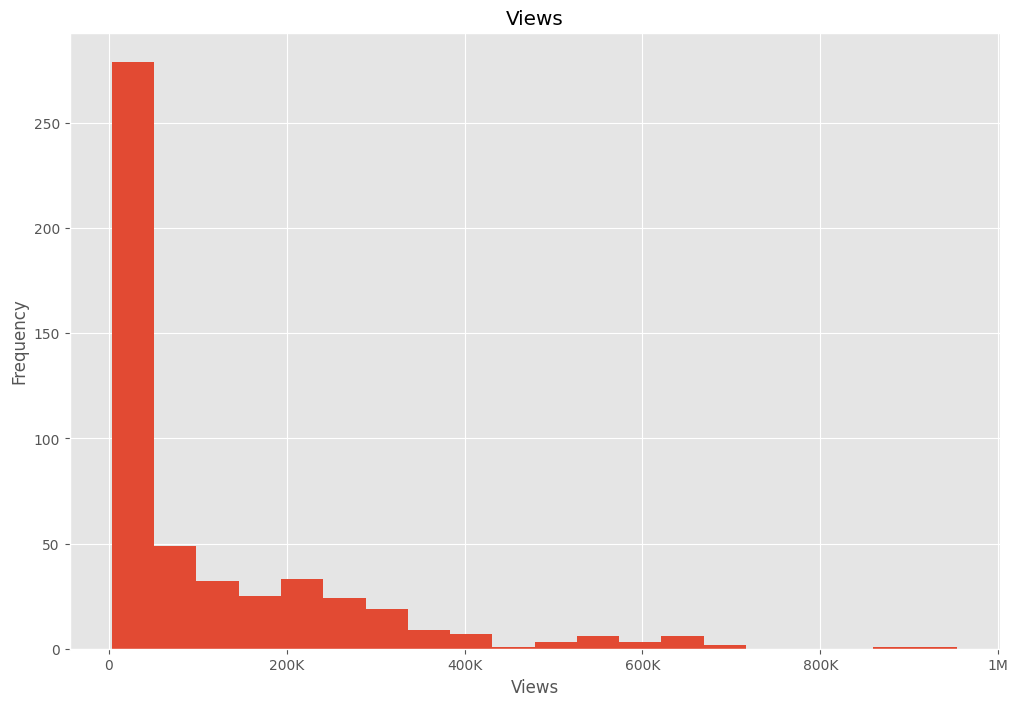

In [ ]:
ax = df.Views.plot(kind = 'hist',bins = 20, title = 'Views')
ax.set_xlabel('Views')
ax.set_xticklabels(['0','0','200K','400K','600K','800K','1M'])
plt.show()

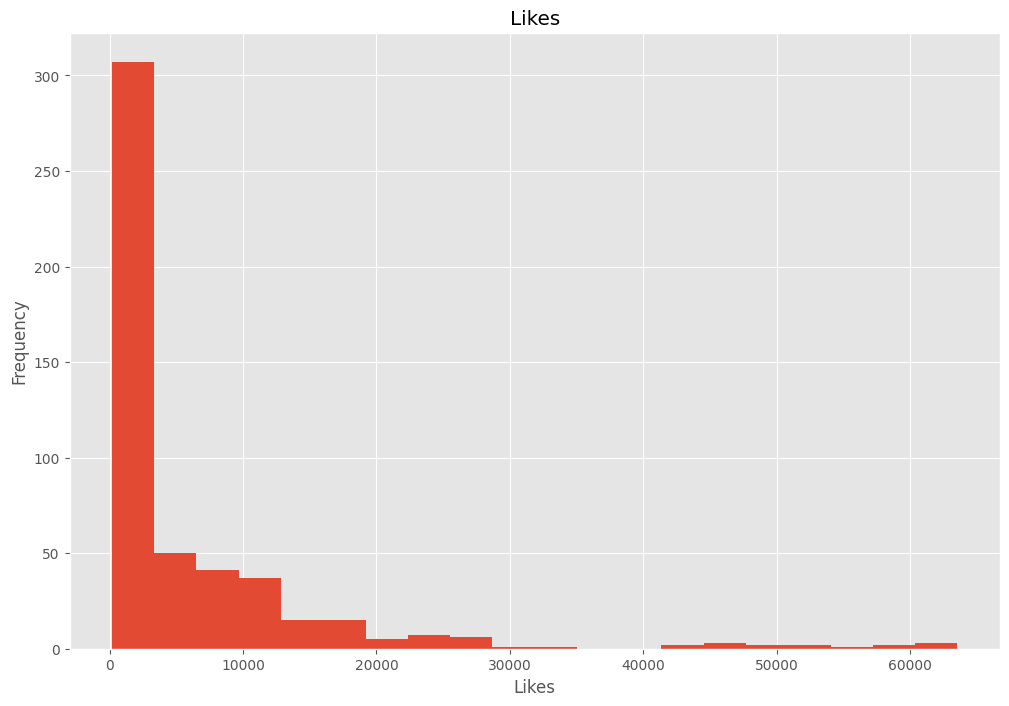

In [ ]:
ax = df.Likes.plot(kind = 'hist', bins = 20, title = 'Likes')
ax.set_xlabel('Likes')
plt.show()

<ipython-input-24-b0a34c70ccb8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','0','2M','4M','6M','8M','10M','12M','14M','16M','18M'])


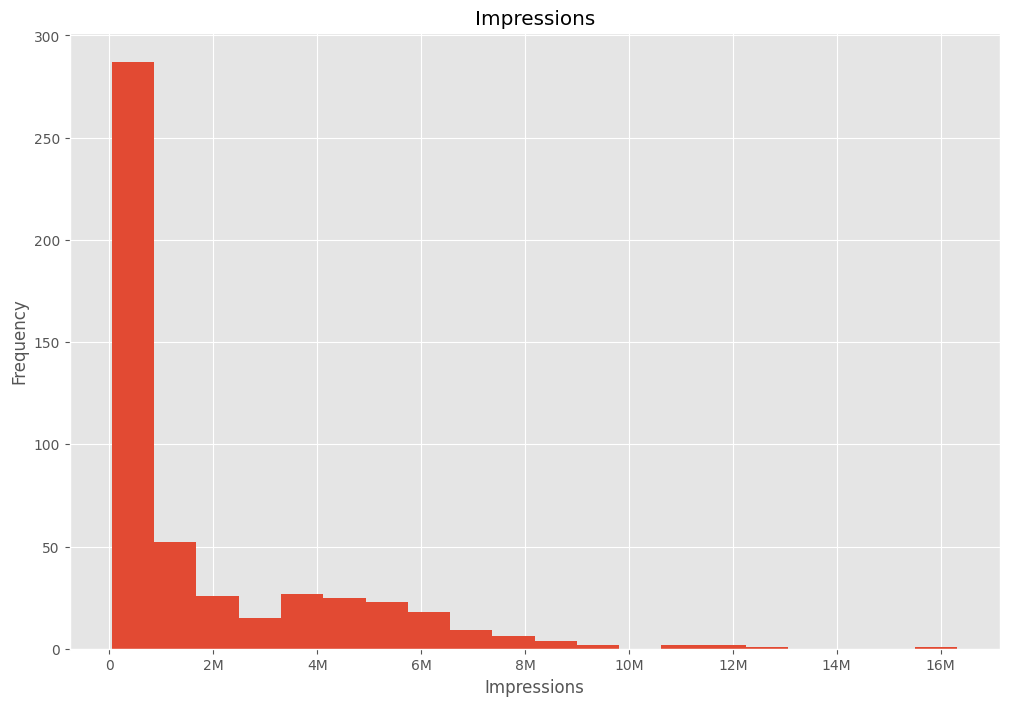

In [ ]:
ax = df.Impressions.plot(kind = 'hist', bins = 20, title = 'Impressions')
ax.set_xlabel('Impressions')
ax.set_xticklabels(['0','0','2M','4M','6M','8M','10M','12M','14M','16M','18M'])
plt.show()

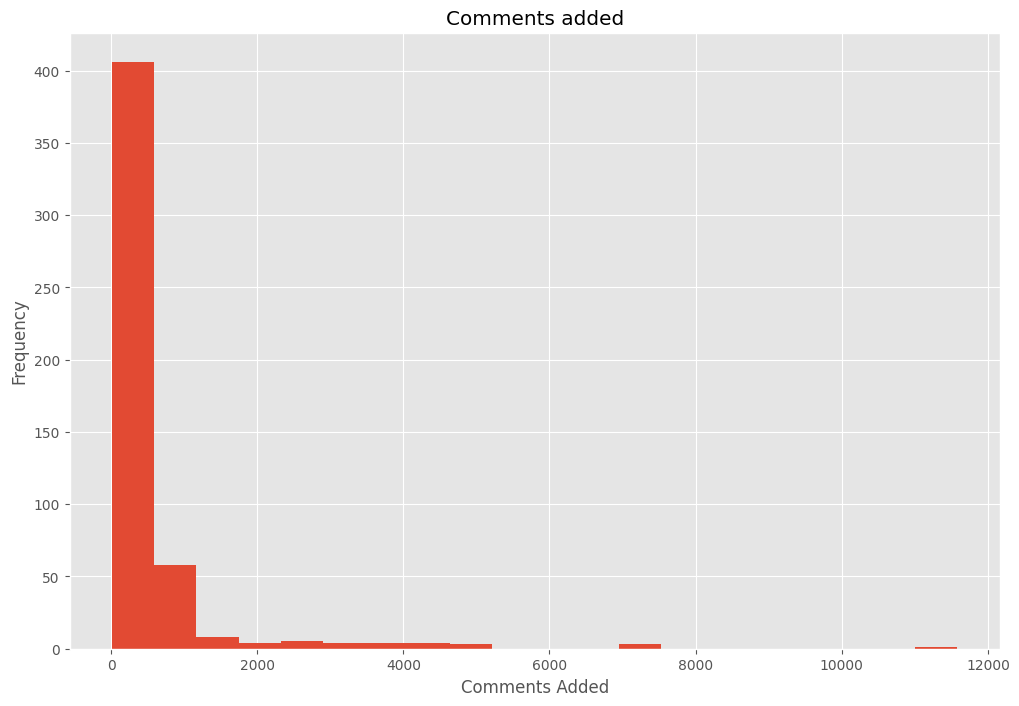

In [ ]:
ax = df['Comments added'].plot(kind = 'hist', bins = 20, title = 'Comments added')
ax.set_xlabel('Comments Added')
plt.show()

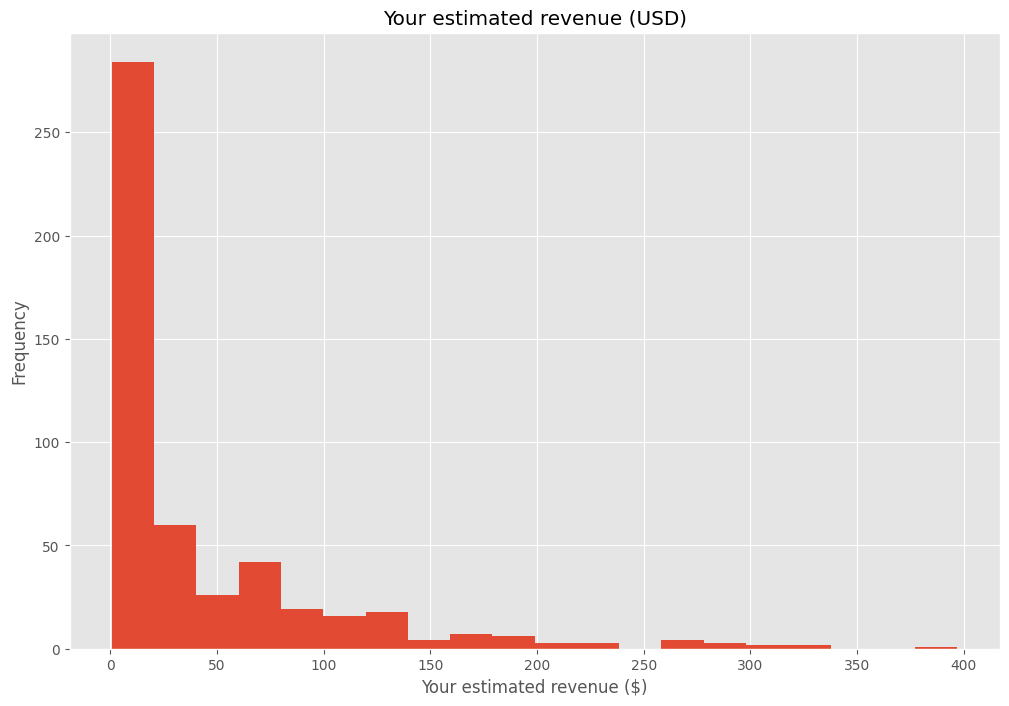

In [ ]:
ax = df['Your estimated revenue (USD)'].plot(kind = 'hist', bins = 20, title = 'Your estimated revenue (USD)')
ax.set_xlabel('Your estimated revenue ($)')
plt.show()

### Feature Relationship

In [ ]:
df.head(2)

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
1,2020-05-15,1.7097,4667.0,6.05,94287.0,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,426.8278,0:03:12,1.112
2,2020-05-16,1.7084,6793.0,6.41,130675.0,206.0,52.0,99.14,9.0,66.0,278.0,1037.0,26.96,1.0,1.0,212.0,11605.0,622.2458,0:03:13,1.610


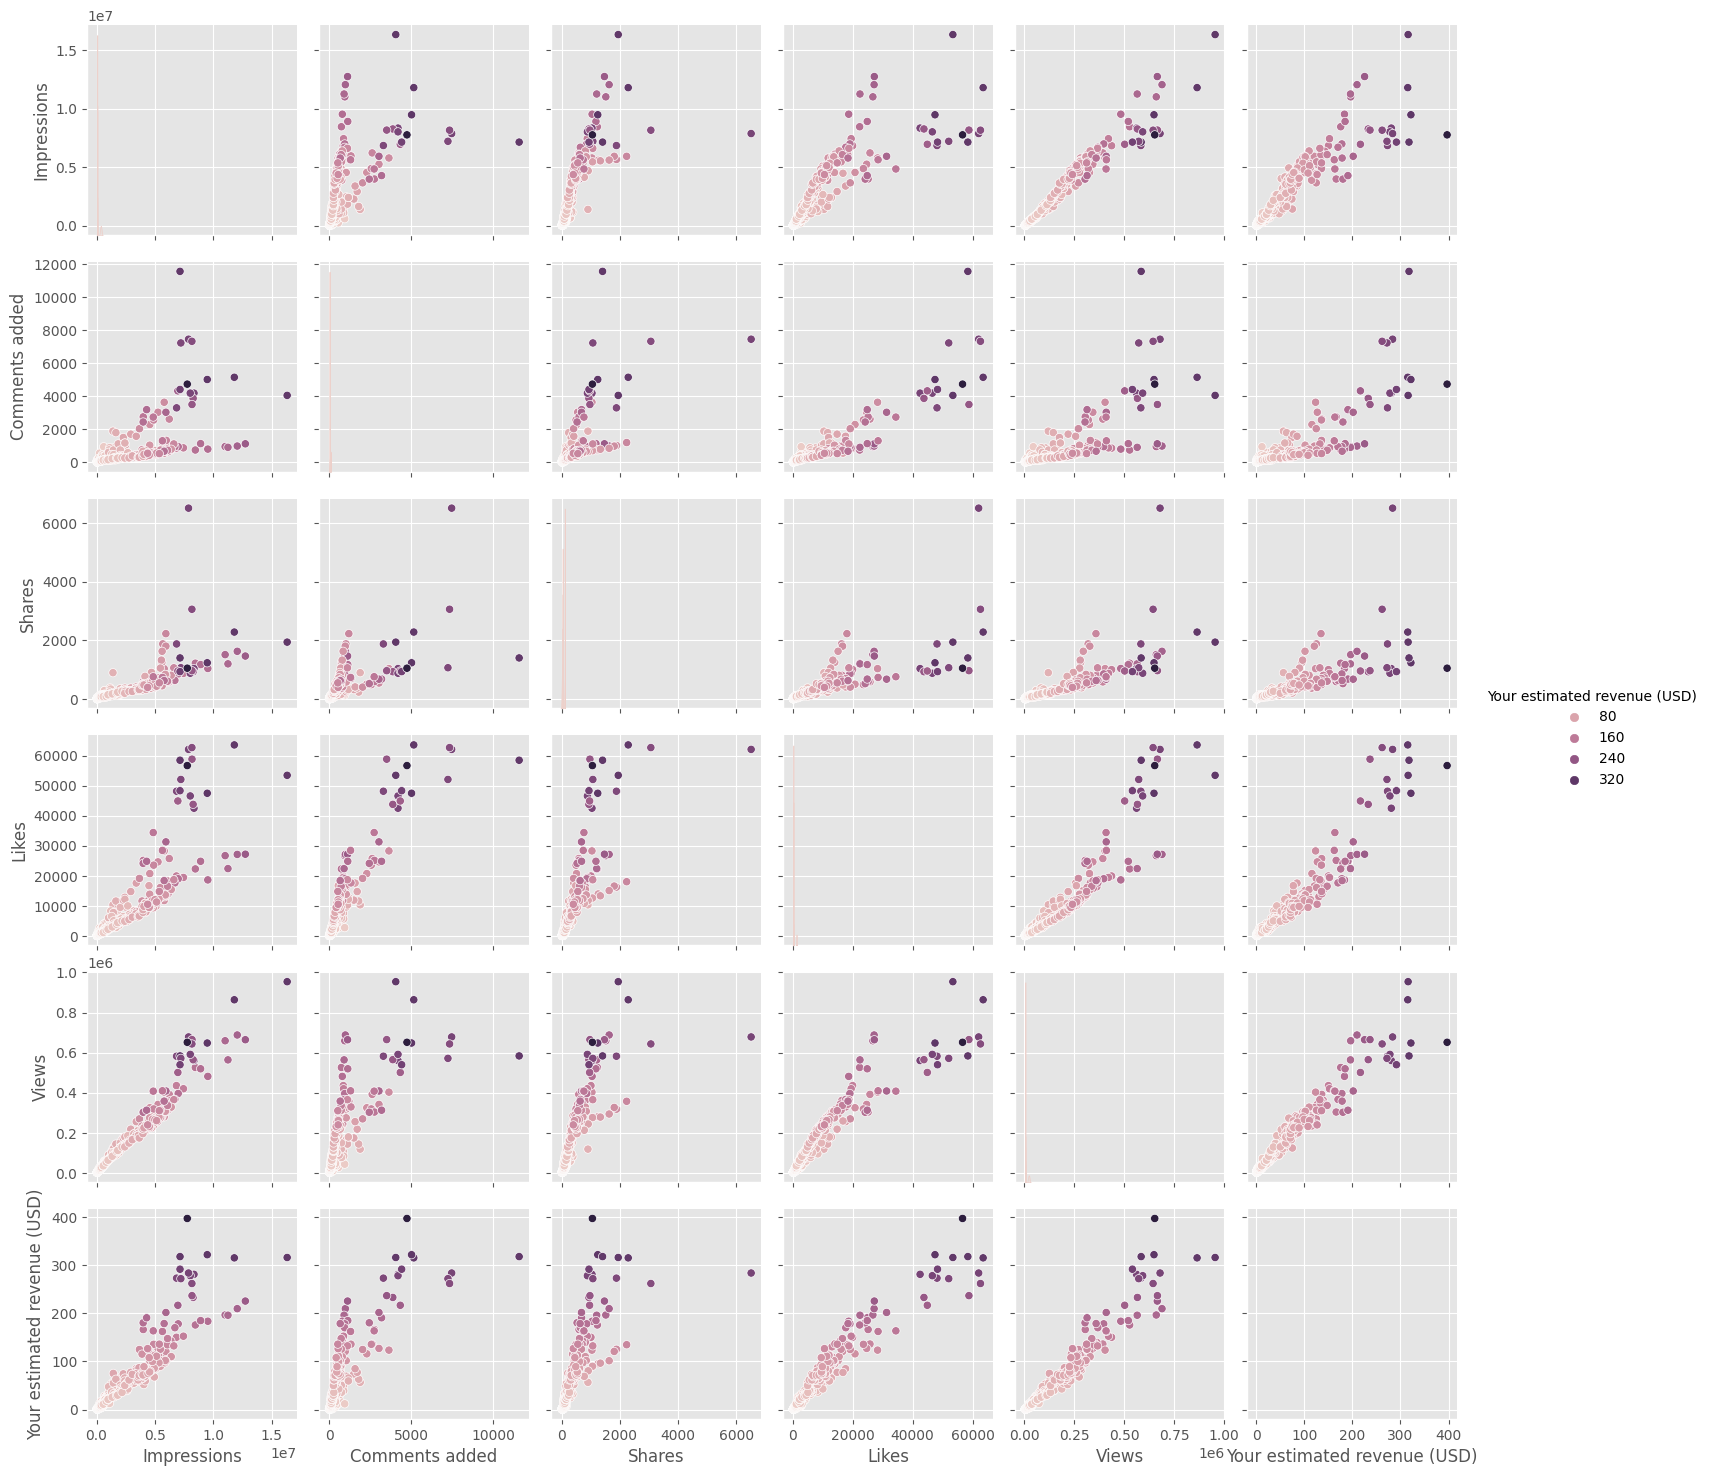

In [ ]:
sns.pairplot(df, vars = ['Impressions','Comments added','Shares','Likes','Views','Your estimated revenue (USD)'], hue = 'Your estimated revenue (USD)')
plt.show()

The following code is to find the correlation between the various attributes of the data set.

In [ ]:
df_corr = df.corr()
df_corr

<ipython-input-30-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Your estimated revenue (USD)
Average views per viewer,1.000000,0.503086,-0.521008,0.643438,0.206424,0.358070,0.280533,0.558406,0.554831,0.548652,0.393990,0.347567,-0.047071,0.114064,0.536754,0.578078,0.558063,0.515416
Unique viewers,0.503086,1.000000,-0.384429,0.958092,0.789429,0.822872,0.404810,0.982707,0.933974,0.954607,0.955848,0.639134,0.385451,0.228935,0.942686,0.993602,0.987617,0.974927
Impressions click-through rate (%),-0.521008,-0.384429,1.000000,-0.541600,-0.030681,-0.284446,-0.027494,-0.420557,-0.496665,-0.472447,-0.216923,-0.460080,0.206904,-0.070199,-0.456914,-0.432493,-0.389971,-0.359777
Impressions,0.643438,0.958092,-0.541600,1.000000,0.629779,0.765989,0.371723,0.959915,0.950673,0.970130,0.852267,0.615672,0.232588,0.191250,0.957594,0.979271,0.957040,0.928537
Comments added,0.206424,0.789429,-0.030681,0.629779,1.000000,0.703861,0.377882,0.756066,0.633592,0.635175,0.907042,0.572342,0.563025,0.227349,0.623845,0.747951,0.804744,0.815097
Shares,0.358070,0.822872,-0.284446,0.765989,0.703861,1.000000,0.308219,0.830956,0.779156,0.805000,0.803652,0.529093,0.266805,0.139463,0.797310,0.806270,0.787178,0.778520
Likes (vs. dislikes) (%),0.280533,0.404810,-0.027494,0.371723,0.377882,0.308219,1.000000,0.363457,0.364817,0.353177,0.417284,0.320808,0.406073,0.217070,0.343374,0.401902,0.413547,0.418574
Dislikes,0.558406,0.982707,-0.420557,0.959915,0.756066,0.830956,0.363457,1.000000,0.933075,0.945312,0.935495,0.627642,0.368504,0.238914,0.931215,0.986823,0.973218,0.958429
Subscribers lost,0.554831,0.933974,-0.496665,0.950673,0.633592,0.779156,0.364817,0.933075,1.000000,0.947963,0.855346,0.581438,0.235652,0.218970,0.915834,0.944088,0.921768,0.919677
Subscribers gained,0.548652,0.954607,-0.472447,0.970130,0.635175,0.805000,0.353177,0.945312,0.947963,1.000000,0.850076,0.603390,0.235615,0.183955,0.996025,0.962929,0.941327,0.906987


Heatmap showing correlation in a visually appealing manner.

<Axes: >

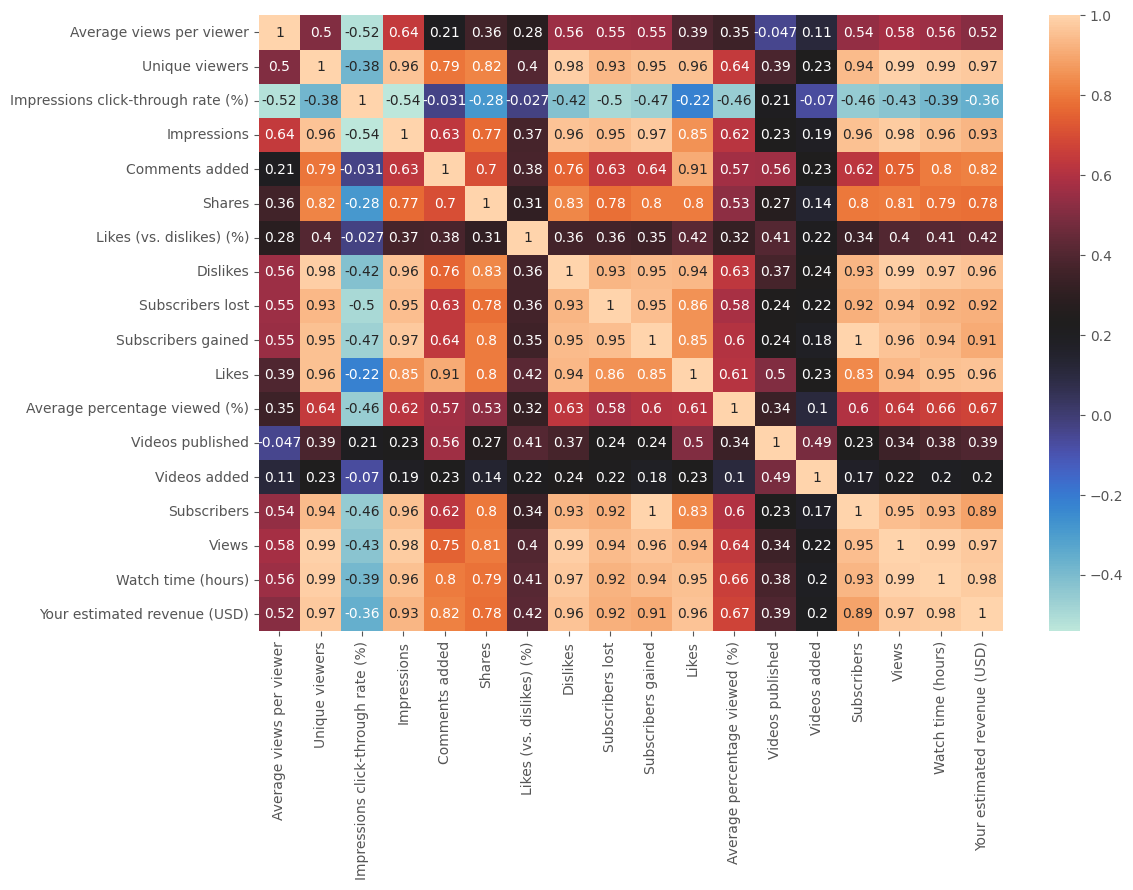

In [ ]:
sns.heatmap(df_corr, annot = True, cmap = 'icefire')

### Analysis

In [10]:
df.head(1)

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD)
1,2020-05-15,1.7097,4667.0,6.05,94287.0,38.0,22.0,98.07,8.0,42.0,261.0,407.0,26.32,0.0,0.0,219.0,7979.0,426.8278,0:03:12,1.112


What is the total revenue generated in 2020?

In [ ]:
df['Your estimated revenue (USD)'].sum().round(2)

21102.39

How many videos were published(made public) in the entire year?

In [ ]:
df['Videos published'].sum()

80.0

How many videos were added to the channel in the entire year?

In [9]:
df['Videos added'].sum()

114.0

What is the average number of views per day?

In [14]:
df['Views'].mean().round()

112030.0

In [16]:
df['Views'].describe()

count       500.000000
mean     112029.986000
std      153411.108224
min        3617.000000
25%        9615.500000
50%       36198.500000
75%      176122.000000
max      954121.000000
Name: Views, dtype: float64


Subscribers gained and lost on average?

In [17]:
df['Subscribers gained'].mean()

1372.612

In [18]:
df['Subscribers lost'].mean()

298.896

In [19]:
df['Subscribers'].mean()

1073.716

What is the revenue generated on a monthly basis?

In [20]:
df['month'] = df.Date.dt.month_name()
df.head()

,Date,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,...,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Average view duration,Your estimated revenue (USD),month
1,2020-05-15,1.7097,4667.0,6.05,94287.0,38.0,22.0,98.07,8.0,42.0,...,407.0,26.32,0.0,0.0,219.0,7979.0,426.8278,0:03:12,1.112,May
2,2020-05-16,1.7084,6793.0,6.41,130675.0,206.0,52.0,99.14,9.0,66.0,...,1037.0,26.96,1.0,1.0,212.0,11605.0,622.2458,0:03:13,1.610,May
3,2020-05-17,1.6535,7131.0,5.50,157867.0,87.0,46.0,99.00,7.0,53.0,...,693.0,25.02,0.0,0.0,281.0,11791.0,595.0406,0:03:01,1.343,May
4,2020-05-18,1.7130,6004.0,5.86,126424.0,56.0,41.0,98.42,8.0,34.0,...,498.0,25.38,0.0,0.0,339.0,10285.0,528.5037,0:03:04,1.063,May
5,2020-05-19,1.6935,5938.0,6.02,122627.0,63.0,25.0,98.48,7.0,43.0,...,455.0,25.35,0.0,0.0,258.0,10056.0,495.8510,0:02:57,1.584,May


In [35]:
df.groupby(['month']).sum()

<ipython-input-35-510247d55e60>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['month']).sum()


,Average views per viewer,Unique viewers,Impressions click-through rate (%),Impressions,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Subscribers lost,Subscribers gained,Likes,Average percentage viewed (%),Videos published,Videos added,Subscribers,Views,Watch time (hours),Your estimated revenue (USD)
month,,,,,,,,,,,,,,,,,,
April,61.4853,1534707.0,152.26,46896337.0,13190.0,5550.0,2944.04,2537.0,5648.0,32616.0,153202.0,951.54,8.0,12.0,26968.0,3111478.0,2.358536e+05,1123.528
August,122.5166,4821919.0,313.98,169180693.0,52759.0,32943.0,6091.62,7171.0,30154.0,115452.0,610054.0,1876.53,6.0,13.0,85298.0,10082965.0,7.825555e+05,3905.776
December,48.4223,554028.0,152.47,13439543.0,4410.0,2943.0,3024.05,1024.0,2809.0,16103.0,44409.0,965.70,3.0,3.0,13294.0,864114.0,5.478758e+04,239.762
February,49.9433,1024138.0,140.02,26286612.0,10006.0,4644.0,2755.84,1418.0,3923.0,23615.0,104286.0,964.43,10.0,13.0,19692.0,1832389.0,1.338842e+05,756.579
January,48.8951,615611.0,153.61,14770261.0,5941.0,3163.0,3028.05,1020.0,3579.0,16046.0,46623.0,943.55,6.0,8.0,12467.0,967938.0,5.859869e+04,224.893
July,124.1078,6531803.0,323.78,236094226.0,46706.0,29896.0,6091.76,9168.0,36465.0,179053.0,724162.0,1955.28,8.0,11.0,142588.0,13863979.0,1.074318e+06,5313.748
June,125.6491,2855978.0,320.81,110053394.0,27088.0,11929.0,5893.16,4878.0,15383.0,73274.0,333390.0,1818.72,7.0,11.0,57891.0,6524801.0,5.241305e+05,2648.253
March,58.3956,1111714.0,155.28,29411276.0,9940.0,4070.0,3044.32,1686.0,4468.0,21844.0,106067.0,1009.79,9.0,13.0,17376.0,2072696.0,1.497399e+05,822.852
May,100.6821,2760007.0,249.89,101569787.0,24509.0,11557.0,4719.62,4750.0,10251.0,71548.0,313364.0,1471.75,9.0,9.0,61297.0,6347543.0,5.093557e+05,1866.439


Conclusion: July seems to be the most profitable month for the Youtube channel
Possible reasons: Perhaps the Vacation season during the summer gives young audiences enough free time to indulge in entertainment in the form of Youtube videos, causing an increase in the number of unique viewers and also the impressions, comments, shares, likes, views, etc.

### Insights

Some future prospects of the above projects:
1. Implementing a machine learning model to predict the revenue generated by a Youtube channel.